In [14]:
import os
import sys
# !{sys.executable} -m pip install python-csv
# !{sys.executable} -m pip install --upgrade pip
# !{sys.executable} -m pip install pandas;
# print(pd.__version__)

,ALP_ID,EXTERNAL_ID,STATUS,START_DATE,END_DATE
0,5883,anonymous,enrolled,2021-08-31,NaT
1,5909,anonymous,enrolled,2021-09-02,NaT
2,5514,anonymous,enrolled,2021-09-02,NaT
3,5594,anonymous,enrolled,2021-09-05,NaT
4,5578,anonymous,enrolled,2021-09-02,NaT


,Unnamed: 0,ALP_ID,VERSION,AUTHORED,QUESTIONNAIRE,LINK_ID,VALUE,VALUECODING_CODE,LANGUAGE,TEXT
0,1,5487,1.1.0,2021-07-21,Q1_personal_info,what_age,NaN,40s,de,Wie alt sind Sie?
1,2,5487,1.1.0,2021-07-21,Q1_personal_info,what_gender,NaN,Male,de,Welchem Geschlecht ordnen Sie sich zu?
2,3,5487,1.1.0,2021-07-21,Q1_personal_info,what_postal_code,250,NaN,de,Was sind die ersten 3 Stellen Ihrer Postleitzahl?
3,4,5487,1.1.0,2021-07-21,Q1_personal_info,which_country_residence,NaN,AT,de,In welchem Land wohnen Sie?
4,5,5487,1.1.0,2021-07-21,Q1_personal_info,what_research_topic,NaN,topic_autoimmune,de,Zu welchen Forschungsthemen haben Sie einen persÃ¶nlichen Bezug?


In [5]:
from lib.display import Display
from lib.mock_db import Database
from lib.schema import Schema

db = Database(Schema.WAITING_LIST)   
Display.header('Waiting list study on ALP', 'h1')

Display.header('Participants', 'h3')
participants_df = db.get_participants()
Display.frame(participants_df, 5)
print('Number of participants:', participants_df.shape[0])

Display.header('Responses', 'h3')
responses_df = db.get_responses()
Display.frame(responses_df.drop(columns=['QUESTIONNAIRE_ID']), 5)
print('Number of responses:', responses_df.shape[0])

,Unnamed: 0,ALP_ID,EXTERNAL_ID,STATUS,START_DATE,END_DATE
0,1,5883,anonymous,enrolled,2021-08-31,NaT
1,2,5909,anonymous,enrolled,2021-09-02,NaT
2,3,5514,anonymous,enrolled,2021-09-02,NaT
3,4,5594,anonymous,enrolled,2021-09-05,NaT
4,5,5578,anonymous,enrolled,2021-09-02,NaT


Number of participants: 226


,Unnamed: 0,ALP_ID,VERSION,AUTHORED,QUESTIONNAIRE,LINK_ID,VALUE,VALUECODING_CODE,LANGUAGE,TEXT
0,1,5487,1.1.0,2021-07-21,Q1_personal_info,what_age,NaN,40s,de,Wie alt sind Sie?
1,2,5487,1.1.0,2021-07-21,Q1_personal_info,what_gender,NaN,Male,de,Welchem Geschlecht ordnen Sie sich zu?
2,3,5487,1.1.0,2021-07-21,Q1_personal_info,what_postal_code,250,NaN,de,Was sind die ersten 3 Stellen Ihrer Postleitzahl?
3,4,5487,1.1.0,2021-07-21,Q1_personal_info,which_country_residence,NaN,AT,de,In welchem Land wohnen Sie?
4,5,5487,1.1.0,2021-07-21,Q1_personal_info,what_research_topic,NaN,topic_autoimmune,de,Zu welchen Forschungsthemen haben Sie einen persÃ¶nlichen Bezug?


Number of responses: 1686


Participants filling questionnaire: 196


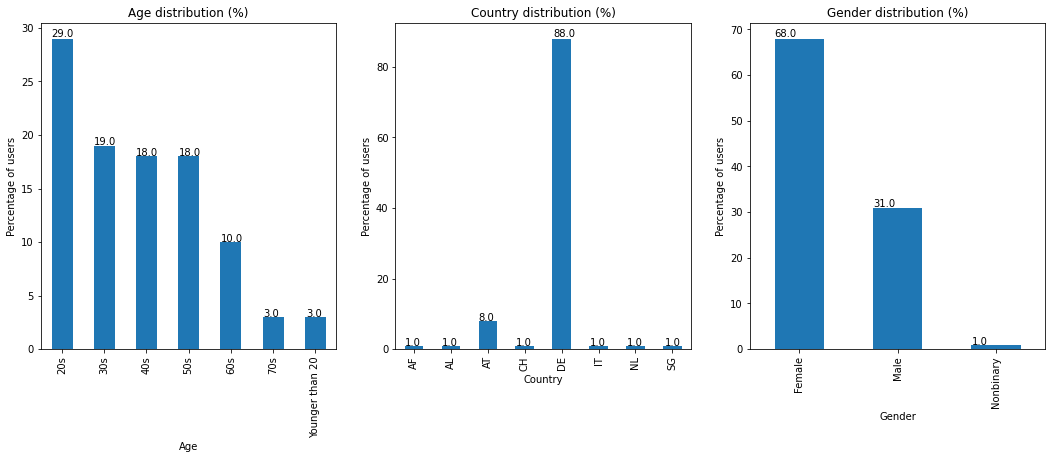

In [8]:
import matplotlib.pyplot as plt
from lib.participant_builder import ParticipantsBuilder

class Registry():
    def name(self):
        'Waiting-list'
    def demographic(self):
        return 'Q1_personal_info'
    def questionnaires(self):
        return {
            'Q1': 'Q1_personal_info'
        }
    
def tag_bars(ax, size=None):
    for p in ax.patches:
        value = f'{round(100 * p.get_height() / size, 2)}%' if size else f'{p.get_height()}'
        ax.annotate(value, (p.get_x() * 1.005, p.get_height() * 1.005))
        
        
def bar_distribution(series, ax, title, xlabel, ylabel):
    value_counts = round(100 * series.value_counts().sort_index() / series.shape[0])
    value_counts.plot(kind="bar", title=title, ax=ax, ylabel=ylabel, xlabel=xlabel)
    tag_bars(ax)
    
def draw(result):
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,6))
    bar_distribution(result['AGE'], ax1, 'Age distribution (%)', 'Age', 'Percentage of users')
    bar_distribution(result['GENDER'], ax3, 'Gender distribution (%)', 'Gender', 'Percentage of users')
    bar_distribution(result['COUNTRY'], ax2, 'Country distribution (%)', 'Country', 'Percentage of users')

df = ParticipantsBuilder(Registry(), participants_df, responses_df) \
    .add_choice('Q1_personal_info','what_age', 'AGE') \
    .add_choice('Q1_personal_info','what_gender', 'GENDER') \
    .add_choice('Q1_personal_info','which_country_residence', 'COUNTRY') \
    .get()

df = df[~df['ENROLED_ON'].isnull()]

Display.header('Demographics', 'h1')
print(f'Participants filling questionnaire: {df.shape[0]}')
draw(df)

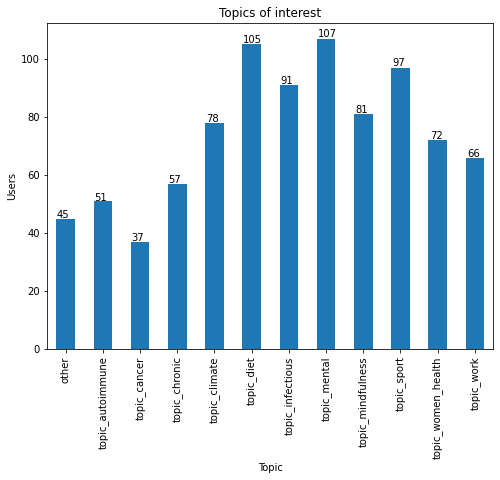

In [9]:
Display.header('Topics of interest', 'h1')

fig, ax1 = plt.subplots(1,1, figsize=(8,6))
    
df = responses_df[responses_df['LINK_ID'] == 'what_research_topic']
vc = df['VALUECODING_CODE'].value_counts().sort_index()

vc.plot(kind="bar", title='Topics of interest', ax=ax1, ylabel='Users', xlabel='Topic')
tag_bars(ax1)

In [10]:
Display.header('Other topics entered by users', 'h2')

df = responses_df[responses_df['LINK_ID'] == 'which_other_topic']
vc = df['VALUE'].value_counts()
df = vc.to_frame().reset_index()
df.columns=['OTHER_TOPIC', 'VOTES']
Display.frame(df)

,OTHER_TOPIC,VOTES
0,Pflege von AngehÃ¶rigen Depressionen Innere StÃ¤rke,1
1,"Kinder, Jugendliche",1
2,"Gesellschaftliche Spaltung, Mobbing/Beleidigungen/ familiÃ¤re Spaltung durch anheizen der Politik und ihre gesundheitlichen Folgen",1
3,TranssexualitÃ¤t (FtM),1
4,"okulÃ¤re Hypertension, EisenmangelanÃ¤mie, Kreuzbandelongation",1
5,Partnerschaft Pflanzenheilkunde und Gesundheit Insekten im privaten Garten Biologischer Anbau von Obst und GemÃ¼se im eigenen Garten Mobbing,1
6,Lang anhaltender Geruchsverlust durch Corona,1
7,Chronische Atemwegserkrankungen (Asthma),1
8,Long Covid,1
9,"Asthma, Cholesterin, Allergie, Bandscheibe",1
